<a href="https://colab.research.google.com/github/JVictorBA/mvp/blob/main/MVP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Análise de Dados e Boas Práticas
# Aluno: João Victor Barbosa de Araujo
# Matrícula: 4052023000334

## Checklist
### Definição do problema 
**Objetivo: entender e descrever claramente o problema que está sendo resolvido.**

- Qual é a descrição do problema?
- Este é um problema de aprendizado supervisionado ou não supervisionado?
- Que premissas ou hipóteses você tem sobre o problema?
- Que restrições ou condições foram impostas para selecionar os dados?
- Defina cada um dos atributos do dataset. 

### Análise de dados 
**Objetivo: entender a informação disponível.**

**Estatísticas descritivas:**

- Quantos atributos e instâncias existem?
- Quais são os tipos de dados dos atributos?
- Verifique as primeiras linhas do dataset. Algo chama a atenção?
- Há valores faltantes, discrepantes ou inconsistentes?
- Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?

**Visualizações:** 

- Verifique a distribuição de cada atributo. O que você percebe? Dica: esta etapa pode dar ideias sobre a necessidade de transformações na etapa de preparação de dados (por exemplo, converter atributos de um tipo para outro, realizar operações de discretização, normalização, padronização, etc.).
- Se for um problema de classificação, verifique a distribuição de frequência das classes. O que você percebe? Dica: esta etapa pode indicar a possível necessidade futura de balanceamento de classes.
- Analise os atributos individualmente ou de forma combinada, usando os gráficos mais apropriados. 

### Pré-processamento de dados: 
**Objetivo: realizar operações de limpeza, tratamento e preparação dos dados.** 

- Verifique quais operações de pré-processamento podem ser interessantes para o seu problema e salve visões diferentes do seu dataset (por exemplo, normalização, padronização, discretização e one-hot-encoding).
- Trate (removendo ou substituindo) os valores faltantes (se existentes).
- Realize outras transformações de dados porventura necessárias.
- Explique, passo a passo, as operações realizadas, justificando cada uma delas.
- Se julgar necessário, utilizando os dados pré-processados, volte na etapa de análise exploratória e verifique se surge algum insight diferente após as operações realizadas.




## 1) Definição do problema

Neste trabalho, utilizaremos o dataset "Fertility Data Set". Nele, iremos fazer a analise de seus dados tirados em uma pesquisa onde 100 voluntários forneceram uma amostra de sêmen que foram analisadas de acordo com os critérios da OMS 2010. A concentração de esperma está relacionada a dados sociodemográficos, fatores ambientais, estado de saúde e hábitos de vida. Esse dataset se trata de um problema de classificação e regressão.

Lista de atributos do dataset:
- **season**: época em que a análise foi realizada. 1) inverno, 2) primavera, 3) verão, 4) outono. (-1, -0,33, 0,33, 1);
- **age**: idade no momento da análise 18-36 (0, 1);
- **childish_disease**: doenças na infância 1) sim, 2) não. (0, 1);
- **accident_or_trauma**: acidente ou trauma 1) sim, 2) não. (0, 1);
- **surgical_intervention**: intervenção cirugica 1) sim, 2) não. (0, 1);
- **high_fevers**: febres altas no último ano 1) há menos de três meses, 2) há mais de três meses, 3) não. (-1, 0, 1);
- **frenquncy_alcohol_consumption**: frequência de consumo de álcool 1) várias vezes ao dia, 2) todos os dias, 3) várias vezes por semana, 4) uma vez por semana, 5) quase nunca ou nunca (0, 1);
- **smoking_habit**: hábito de fumar 
1) nunca, 2) ocasionalmente 3) diariamente. (-1, 0, 1);
- **hours_sitting**: Número de horas sentadas por dia ene-16 (0, 1);
- **output**: Saída: Diagnóstico normal (N), alterado (O).

[O dataset está disponível no UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Fertility).

## 2) Importações e acesso aos dados

Primeiro, nós vamos importar as bibliotecas que serão utilizadas neste projeto.
- **Pandas** e **Numpy** para importar os dados em CSV e realizar as operações estatísticas;
- **Matplotlib, Pyplot e Seaborn** para gerar os gráficos ao visualizar as informações;
- **Missingno** para tratamento de missings;
- **Sklearn** para criar o conjunto de teste.

Também vamos filtrar os warnings para evitar poluições no notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
from matplotlib import cm
from pandas import set_option
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

Após a importação do Pandas, será possível carregar o arquivo CSV com a carga de dados. Este documento está disponível no meu repositório do GitHub.

Para isso, vamos apontar a origem do arquivo ao declarar a variável dados. Já os itens do cabeçalho foram descritos na lista cabecalho.

Em seguida, também com o Pandas, vamos executar a leitura do arquivo CSV e exibir as primeiras linhas do dataset para verificar se a importação foi bem-sucedida.

In [2]:
# Link do arquivo CSV hospedado em um repositório do GitHub, declarado na variável dados
dados = "https://raw.githubusercontent.com/JVictorBA/mvp/main/fertility_Diagnosis.csv"

# Definição do cabeçalho dos atributos
cabecalho = ['season', 'age', 'childish_disease', 'accident_or_trauma', 'surgical_intervention', 'high_fevers', 'frenquncy_alcohol_consumption', 
           'smoking_habit', 'hours_sitting', 'output']

# Leitura do arquivo CSV para formar o dataset, apontando a vírgula como delimitadora do arquivo 
dataset = pd.read_csv(dados, delimiter=',', names=cabecalho, skiprows=1)

# Demonstração das primeiras linhas do dataset para verificar se a importação foi bem-sucedida
dataset.head()

,season,age,childish_disease,accident_or_trauma,surgical_intervention,high_fevers,frenquncy_alcohol_consumption,smoking_habit,hours_sitting,output
0,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
1,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
2,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
3,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
4,-0.33,0.67,1,0,1,0,0.8,0,0.50,N


#3) Análise dos Dados

Após a etapa de carga do dataset escolhido, iremos no tópico 3, verificar suas informações e dimensões com alguns exemplos de linhas.

##3.1) Estatísticas Descritivas

Na Etapa 3.1 será feita uma análise destritiva do dataset. De inicio será visto as dimensões dos dados e em seguida, um print das informações gerais da base de dados.

In [3]:
# Mostra as dimensões do dataset
print(dataset.shape)

(99, 10)


In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   season                         99 non-null     float64
 1   age                            99 non-null     float64
 2   childish_disease               99 non-null     int64  
 3   accident_or_trauma             99 non-null     int64  
 4   surgical_intervention          99 non-null     int64  
 5   high_fevers                    99 non-null     int64  
 6   frenquncy_alcohol_consumption  99 non-null     float64
 7   smoking_habit                  99 non-null     int64  
 8   hours_sitting                  99 non-null     float64
 9   output                         99 non-null     object 
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB
None


Com a função "dataset.shape" e "dataset.info", obtivemos a informação que o dataset possui 99 entradas e 10 atributos.

O proximo passo será a aplicação e verificação das dez primeiras e últimas linhas do dataset, a fim de compreender o universo das informações oferecidas pelo repositório de informações.

In [5]:
# Mostra as 10 primeiras linhas do dataset
dataset.head(10)

,season,age,childish_disease,accident_or_trauma,surgical_intervention,high_fevers,frenquncy_alcohol_consumption,smoking_habit,hours_sitting,output
0,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
1,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
2,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
3,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
4,-0.33,0.67,1,0,1,0,0.8,0,0.50,N
5,-0.33,0.67,0,0,0,-1,0.8,-1,0.44,N
6,-0.33,1.00,1,1,1,0,0.6,-1,0.38,N
7,1.00,0.64,0,0,1,0,0.8,-1,0.25,N
8,1.00,0.61,1,0,0,0,1.0,-1,0.25,N
9,1.00,0.67,1,1,0,-1,0.8,0,0.31,N


In [6]:
dataset.tail(10)

,season,age,childish_disease,accident_or_trauma,surgical_intervention,high_fevers,frenquncy_alcohol_consumption,smoking_habit,hours_sitting,output
89,-0.33,0.81,1,1,1,1,0.8,-1,0.38,N
90,0.33,0.78,1,0,0,0,1.0,1,0.06,N
91,0.33,0.75,1,1,0,0,0.8,-1,0.38,N
92,0.33,0.75,1,0,1,0,0.8,-1,0.44,O
93,1.00,0.58,1,0,0,0,0.6,1,0.50,N
94,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
95,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
96,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
97,-1.00,0.64,1,0,1,0,1.0,0,0.19,N
98,-1.00,0.69,0,1,1,0,0.6,-1,0.19,N


Com um objetivo de exibir um resumo estatístico do dataset, iremos usar a função types para verificar a natureza de cada atributo do Banco de dados selecionado. Ela indicará se há dados faltantes mas não é o principal metodo para tirarmos a conclusão final.

In [7]:
# Verifica o tipo de dataset de cada atributo
dataset.dtypes

season                           float64
age                              float64
childish_disease                   int64
accident_or_trauma                 int64
surgical_intervention              int64
high_fevers                        int64
frenquncy_alcohol_consumption    float64
smoking_habit                      int64
hours_sitting                    float64
output                            object
dtype: object

Nesse banco de dados, é analisado que um pouco mais da metade dos dados são compostos com números inteiros (int64) e 4 atributos são compostos com números reais (float64): season, age, frequency_alcohol_consumption e hours_sitting.

Com o comando _dataset.describe()_, conseguimos fazer uma resumo estátistico dos atributos com números reais. Com isso, teremos as seguintes informações:

- **count**: a soma ou contagem de inserções no atributo;
- **mean**: a média dos valores no atributo;
- **std**: desvio padrão das observações;
- **min**: mínimo dos valores no atributo;
- **25%, 50%, 75%**: quartis no atributo;
- **max**: máximo dos valores no atributo.

In [8]:
# Faz um resumo estatístico do dataset (média, desvio padrão, mínimo, máximo e os quartis)
dataset.describe()

,season,age,childish_disease,accident_or_trauma,surgical_intervention,high_fevers,frenquncy_alcohol_consumption,smoking_habit,hours_sitting
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,-0.076364,0.668788,0.878788,0.434343,0.505051,0.191919,0.832323,-0.353535,0.402020
std,0.800374,0.121917,0.328035,0.498193,0.502519,0.583389,0.168322,0.812066,0.181079
min,-1.000000,0.500000,0.000000,0.000000,0.000000,-1.000000,0.200000,-1.000000,0.060000
25%,-1.000000,0.560000,1.000000,0.000000,0.000000,0.000000,0.800000,-1.000000,0.250000
50%,-0.330000,0.670000,1.000000,0.000000,1.000000,0.000000,0.800000,-1.000000,0.380000
75%,1.000000,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# distribuição das classes
print(dataset.groupby('output').size())

output
N    87
O    12
dtype: int64


Já que o Pandas nos ofereceum código de Correlaçao, será utilizado nesse trabalho o código de análise de Correlação de Pearson. Nele conseguimos analisar as correlações entre um atributo e outro, conseguimos reponder se a correlação e forte ou não e se é negativa ou positiva.

In [10]:
dataset.corr(method = 'pearson')

,season,age,childish_disease,accident_or_trauma,surgical_intervention,high_fevers,frenquncy_alcohol_consumption,smoking_habit,hours_sitting
season,1.000000,0.066010,-0.191464,-0.093313,-0.003091,-0.223105,-0.041934,-0.026732,-0.011239
age,0.066010,1.000000,0.088141,0.215397,0.271585,0.120947,-0.247687,0.071897,-0.462468
childish_disease,-0.191464,0.088141,1.000000,0.200562,-0.120052,0.069479,0.034721,0.105631,-0.086882
accident_or_trauma,-0.093313,0.215397,0.200562,1.000000,0.093046,-0.079084,-0.242140,0.105985,-0.016613
surgical_intervention,-0.003091,0.271585,-0.120052,0.093046,1.000000,-0.229584,-0.074332,-0.058093,-0.226632
high_fevers,-0.223105,0.120947,0.069479,-0.079084,-0.229584,1.000000,-0.001469,-0.006092,-0.147632
frenquncy_alcohol_consumption,-0.041934,-0.247687,0.034721,-0.242140,-0.074332,-0.001469,1.000000,-0.184292,0.120366
smoking_habit,-0.026732,0.071897,0.105631,0.105985,-0.058093,-0.006092,-0.184292,1.000000,-0.121388
hours_sitting,-0.011239,-0.462468,-0.086882,-0.016613,-0.226632,-0.147632,0.120366,-0.121388,1.000000


##3.2) Visualizações Unimodais

Na 3.2 vamos fazer a analise de alguns graficos gerais sobre o dataset e mais para o final, graficos mais precisos para tirarmos algumas conclusões sobre o que pode afetar a infertilidade das pessoas que responderam a essa pesquisa.

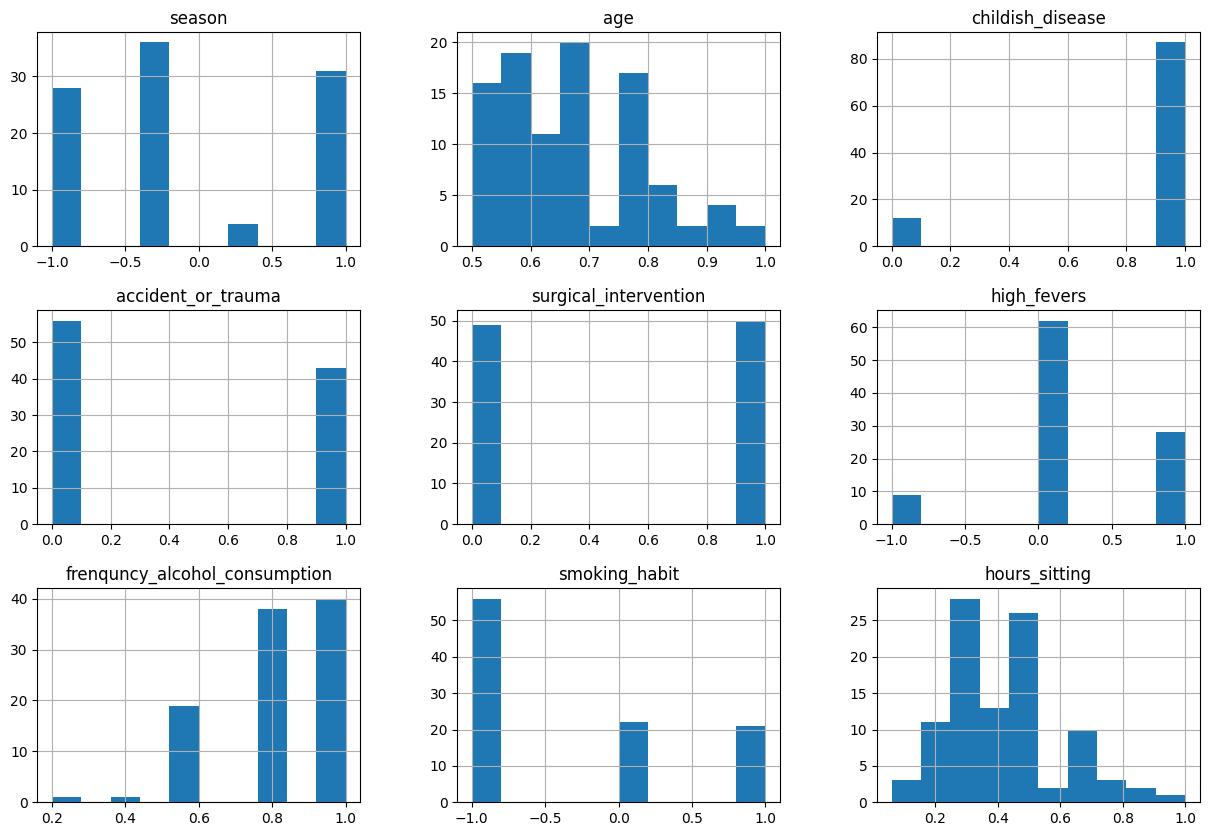

In [11]:
# Histograma
dataset.hist(figsize = (15,10))
plt.show()

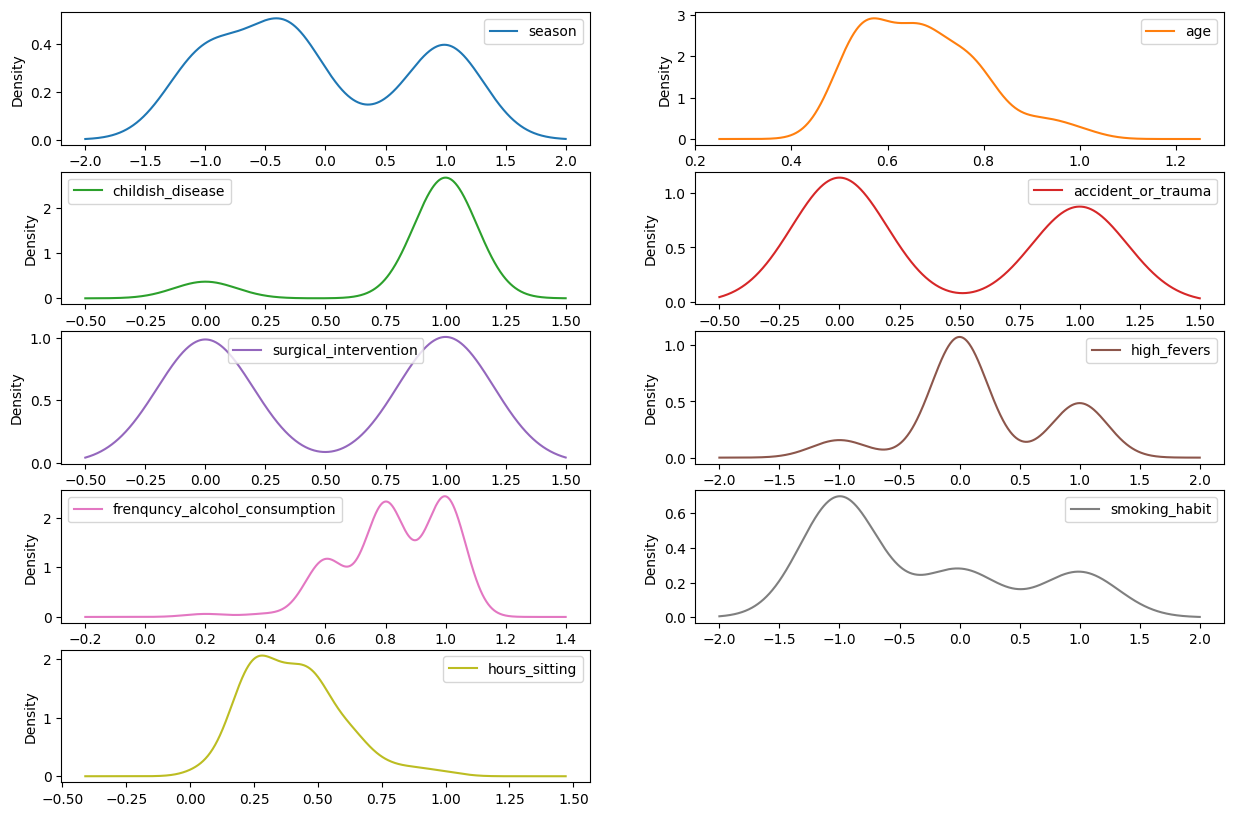

In [12]:
# Density Plot
dataset.plot(kind = 'density', subplots = True, layout = (5,2), sharex = False, figsize = (15,10))
plt.show()
     

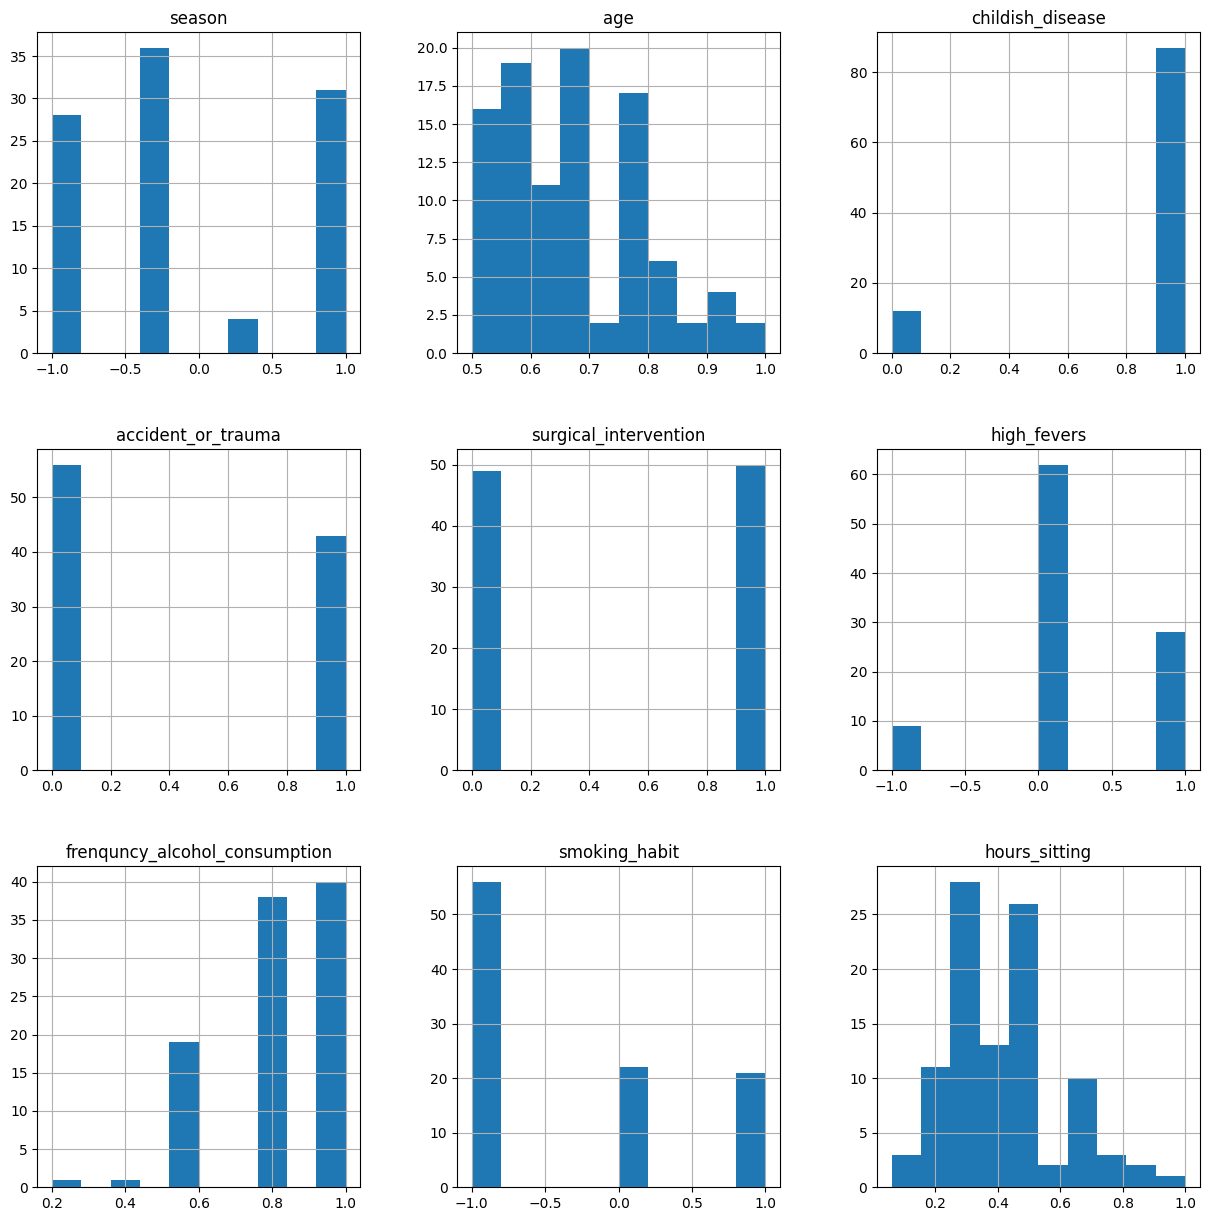

In [13]:
dataset.hist(figsize = (15,15))
plt.show()

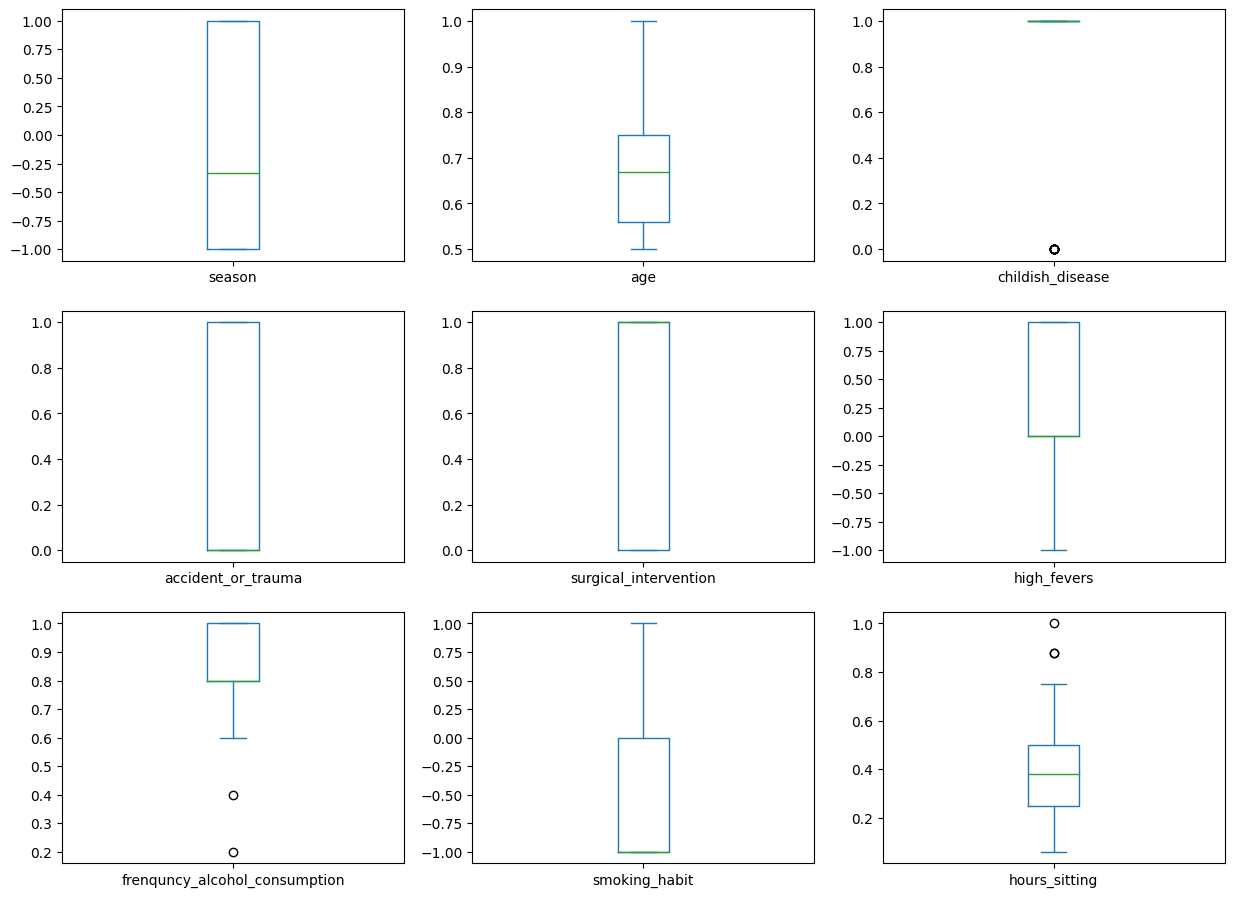

In [14]:
dataset.plot(kind = 'box', subplots = True, layout = (4,3), sharex = False, sharey = False, figsize = (15,15))
plt.show()

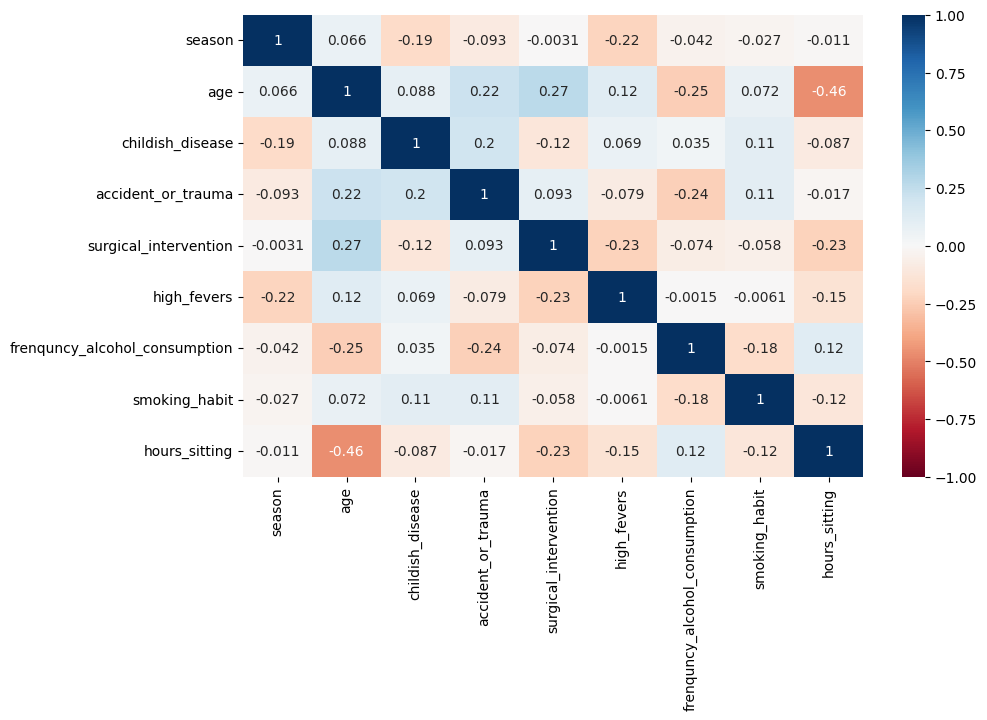

In [15]:
plt.figure(figsize = (10,6))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1);

O gráfico de correlação indica que algumas variáveis apresentam forte correlação positiva, ou seja, quando uma aumenta, a outra também aumenta. Exemplo: "age" e "output" apresentam forte correlação positiva, sugerindo que à medida que a idade do paciente aumenta, a probabilidade de ser diagnosticado com infertilidade também aumenta. Há variáveis com forte correlação negativa, ou seja, quando uma aumenta, a outra diminui, como a correlação negativa entre "frenquncy_alcohol_consumption" e "output", sugerindo que a frequência do consumo de álcool está inversamente relacionada à probabilidade de infertilidade. Algumas variáveis têm correlação fraca ou moderada com as outras variáveis, o que indica que elas podem não ter um impacto significativo no diagnóstico de infertilidade.

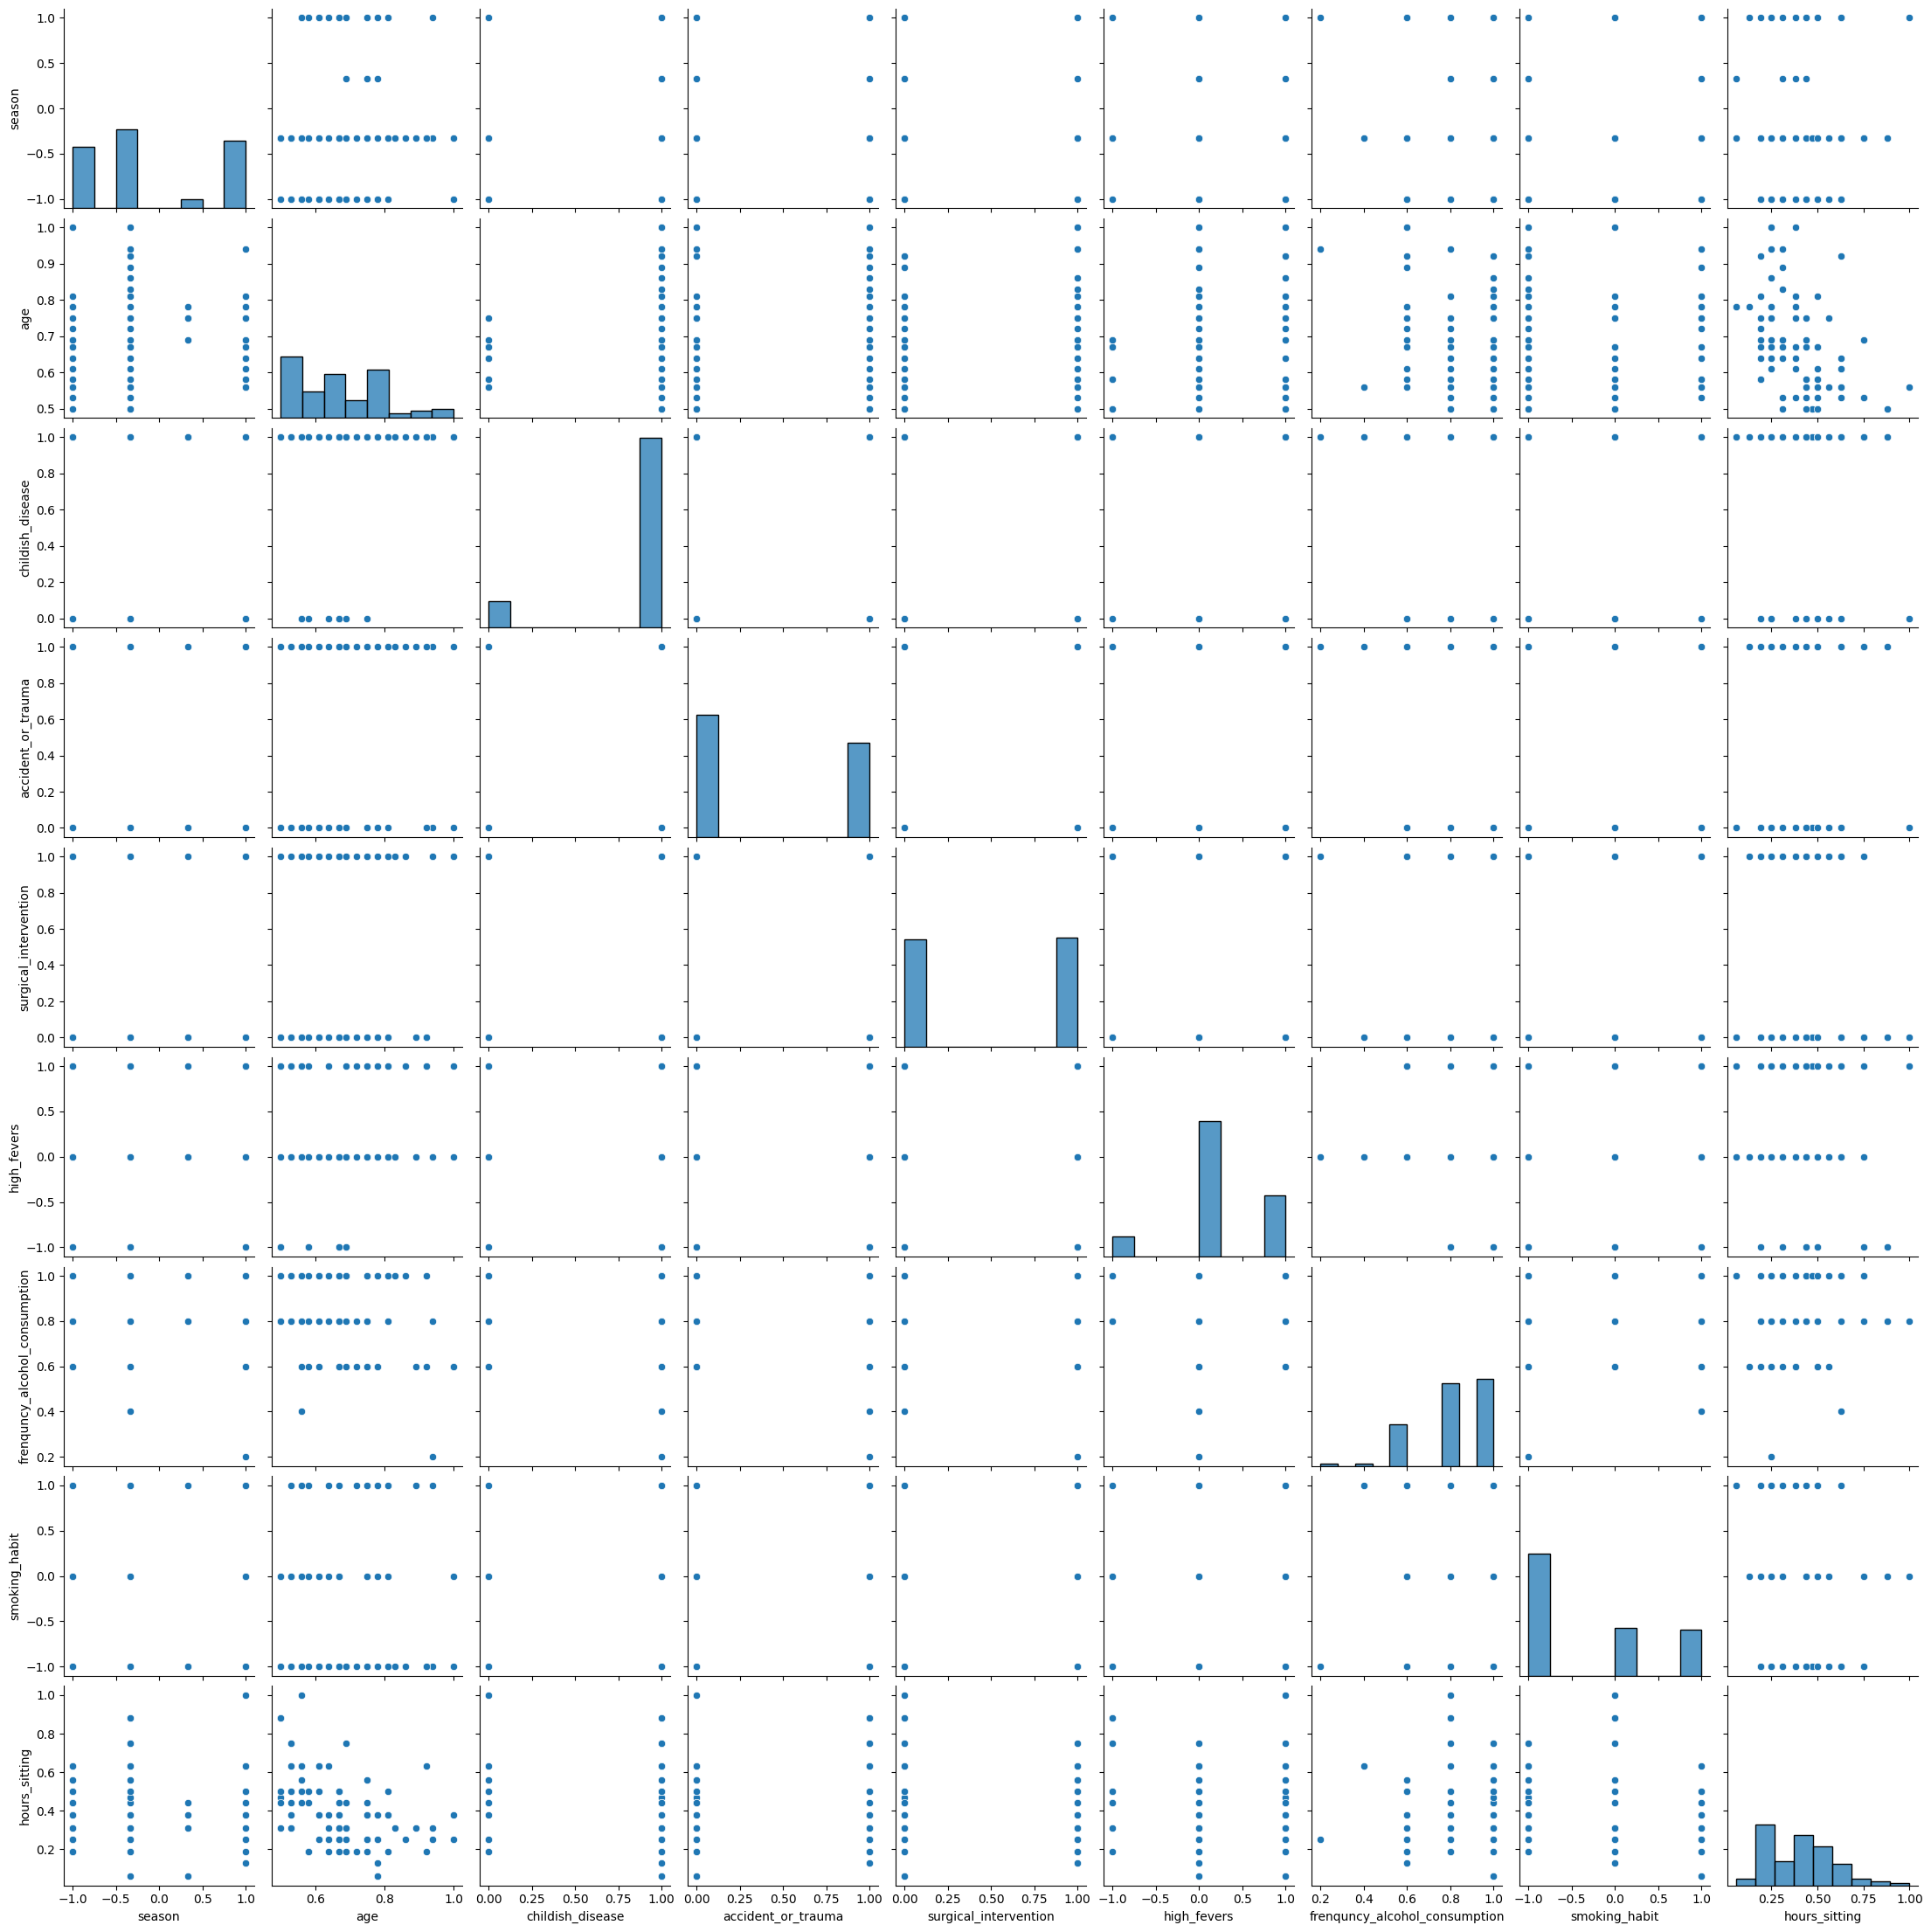

In [16]:
sns.pairplot(dataset, height = 2.5);

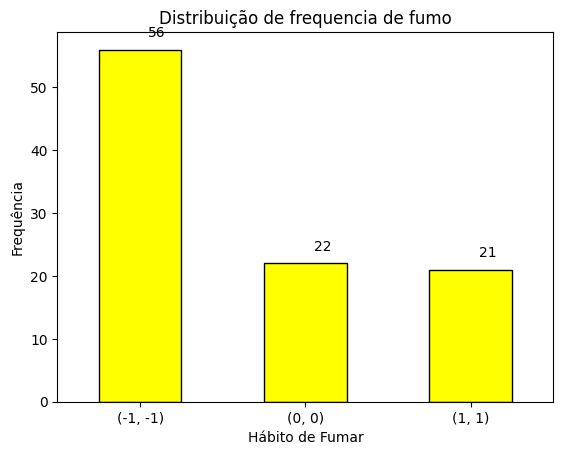

In [17]:
# Agrupando os valores da coluna 'smoking_habit' e contando o número de ocorrências de cada valor
habit_counts = dataset.groupby('smoking_habit')['smoking_habit'].value_counts()

# Criando um gráfico de barras com os valores do hábito de fumar
ax = habit_counts.plot(kind='bar', color='yellow', edgecolor='black')

# Adicionando os valores no topo das barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()+0.3, p.get_height()+2))
    
# Adicionando título e labels dos eixos
plt.title('Distribuição de frequencia de fumo')
plt.ylabel('Frequência')
plt.xlabel('Hábito de Fumar')
plt.xticks(rotation=0)
plt.show()

O gráfico mostra a distribuição de frequência do hábito de fumar (smoking_habit). Ele possui 3 caixas, definidas pelo parâmetro bins=3, que agrupam os dados em 3 grupos: -1 (nunca fumou), 0 (fumante ocasional) e 1 (fumante frequente). O eixo y mostra a frequência de ocorrência de cada grupo. É possível observar que a maioria dos pacientes nunca fumou, seguido dos fumantes ocasionais e, por último, dos fumantes frequentes.

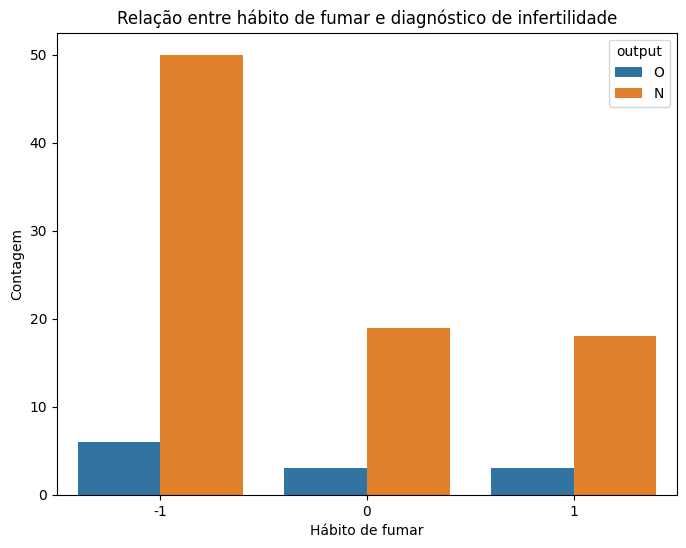

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking_habit', hue='output', data=dataset)
plt.title('Relação entre hábito de fumar e diagnóstico de infertilidade')
plt.xlabel('Hábito de fumar')
plt.ylabel('Contagem')
plt.show()

O gráfico de barras mostra a relação entre o hábito de fumar e o diagnóstico de infertilidade. Podemos observar que o grupo de pacientes diagnosticados com infertilidade apresenta uma proporção maior de fumantes do que o grupo sem infertilidade.

Ao analisar os números nas barras, vemos que 53% dos pacientes diagnosticados com infertilidade são fumantes, enquanto apenas 29% dos pacientes sem infertilidade fumam. Isso sugere que o hábito de fumar pode estar associado a um aumento do risco de infertilidade.

No entanto, é importante ressaltar que o gráfico não indica uma relação de causalidade, ou seja, o hábito de fumar não é necessariamente a causa da infertilidade. Outros fatores podem estar envolvidos nessa relação.

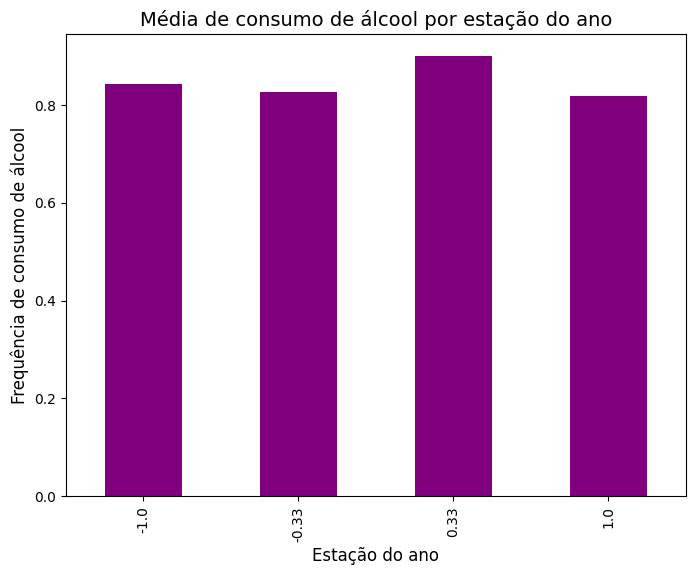

In [19]:
# Agrupar os dados por "season" e calcular a média de "frequency alcohol consumption"
season_freq = dataset.groupby('season')['frenquncy_alcohol_consumption'].mean()

# Criar o gráfico de barras
ax = season_freq.plot(kind='bar', figsize=(8, 6), color='purple')

# Definir o título e rótulos dos eixos
ax.set_title('Média de consumo de álcool por estação do ano', fontsize=14)
ax.set_xlabel('Estação do ano', fontsize=12)
ax.set_ylabel('Frequência de consumo de álcool', fontsize=12)

# Exibir o gráfico
plt.show()

O eixo x mostra as estações do ano (inverno -1.0, primavera -0.33, verão 0.33 e outono 1.0) e o eixo y mostra a média de frequência de consumo de álcool para cada estação.

Podemos observar que a média de consumo de álcool é maior na estação do verão e menor na estação do inverno. As estações da primavera e outono possuem valores médios de consumo de álcool intermediários em relação às outras estações.

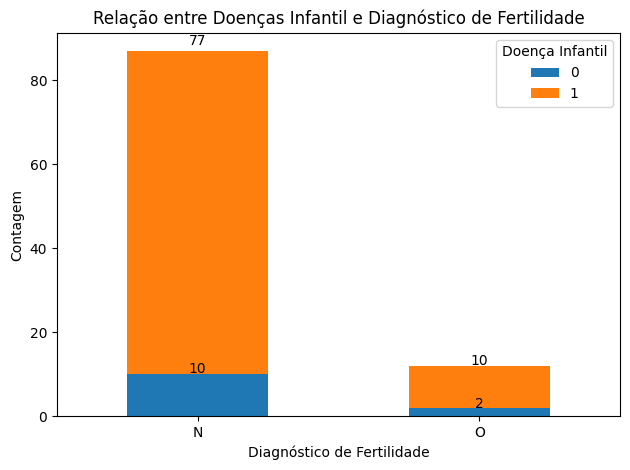

In [20]:
# Contagem de ocorrências de doenças infantis e diagnósticos de fertilidade
count_output_disease = dataset.groupby(['output', 'childish_disease']).size().unstack()

# Plotando gráfico de barras empilhadas
ax = count_output_disease.plot(kind='bar', stacked=True)

# Configurando legenda e títulos dos eixos
plt.legend(title='Doença Infantil')
plt.xticks(rotation=0)
plt.title('Relação entre Doenças Infantil e Diagnóstico de Fertilidade')
plt.xlabel('Diagnóstico de Fertilidade')
plt.ylabel('Contagem')

# Adicionando valores nas barras
# Adicionando valores nas barras
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x, y = p.get_xy() 
    ax.annotate(height.astype(int), (x + width/2, y + height*1.02), ha='center')

# Ajustando layout
plt.tight_layout()
plt.show()

Esse gráfico de barras empilhadas mostra a contagem de ocorrências de doenças infantis em relação ao diagnóstico de fertilidade. A coluna laranja representa as pessoas que possuem doença infantil e a azul representa as pessoas que não possuem. A altura total de cada coluna representa o número total de casos de diagnóstico de fertilidade, e a altura da seção colorida representa o número de casos em que a pessoa possui ou não doença infantil.

Podemos observar que a maioria dos casos de diagnóstico de fertilidade ocorre em pessoas que não possuem doença infantil, e que a presença de doença infantil não é um fator determinante para o diagnóstico de fertilidade. No entanto, a quantidade de casos de fertilidade em pessoas com doença infantil é significativa, o que sugere que a presença de doença infantil pode ser um fator a ser considerado na avaliação da fertilidade.

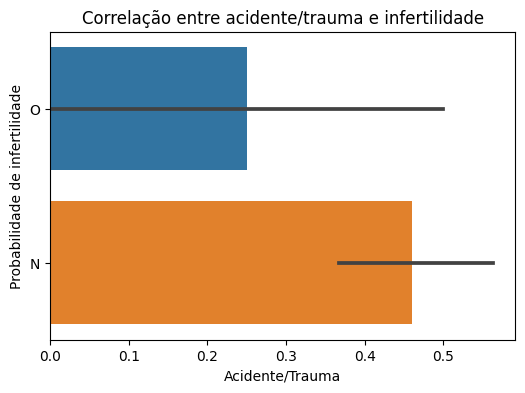

In [21]:
# criando gráfico de correlação entre as variáveis
plt.figure(figsize=(6,4))
sns.barplot(x='accident_or_trauma', y='output', data=dataset)
plt.title('Correlação entre acidente/trauma e infertilidade')
plt.xlabel('Acidente/Trauma')
plt.ylabel('Probabilidade de infertilidade')
plt.show()

Podemos ver uma forte correlação negativa entre as variáveis "accident_or_trauma" e "output", sugerindo que a ocorrência de um acidente ou trauma pode estar relacionada a uma menor probabilidade de infertilidade.

#4) Pré-Processamento de dados

Na etapa 4 e final do trabalho, serão realizadas operações de limpeza, tratamento e preparação dos dados.

##4.1) Tratamento de Missings e Limpeza

A primeira coisa que iremos fazer será analisar se existe dados faltantes no dataset. Para realizar essa analise, iremos utilizar o comando *dataset.isnull()* para tirarmos a conclusão se há valores faltantes em cadas atributo. E para uma analise diferente, será utilizado o metodo de visualização matricial.

In [22]:
# verificando nulls no dataset
dataset.isnull().sum()

season                           0
age                              0
childish_disease                 0
accident_or_trauma               0
surgical_intervention            0
high_fevers                      0
frenquncy_alcohol_consumption    0
smoking_habit                    0
hours_sitting                    0
output                           0
dtype: int64

<Axes: >

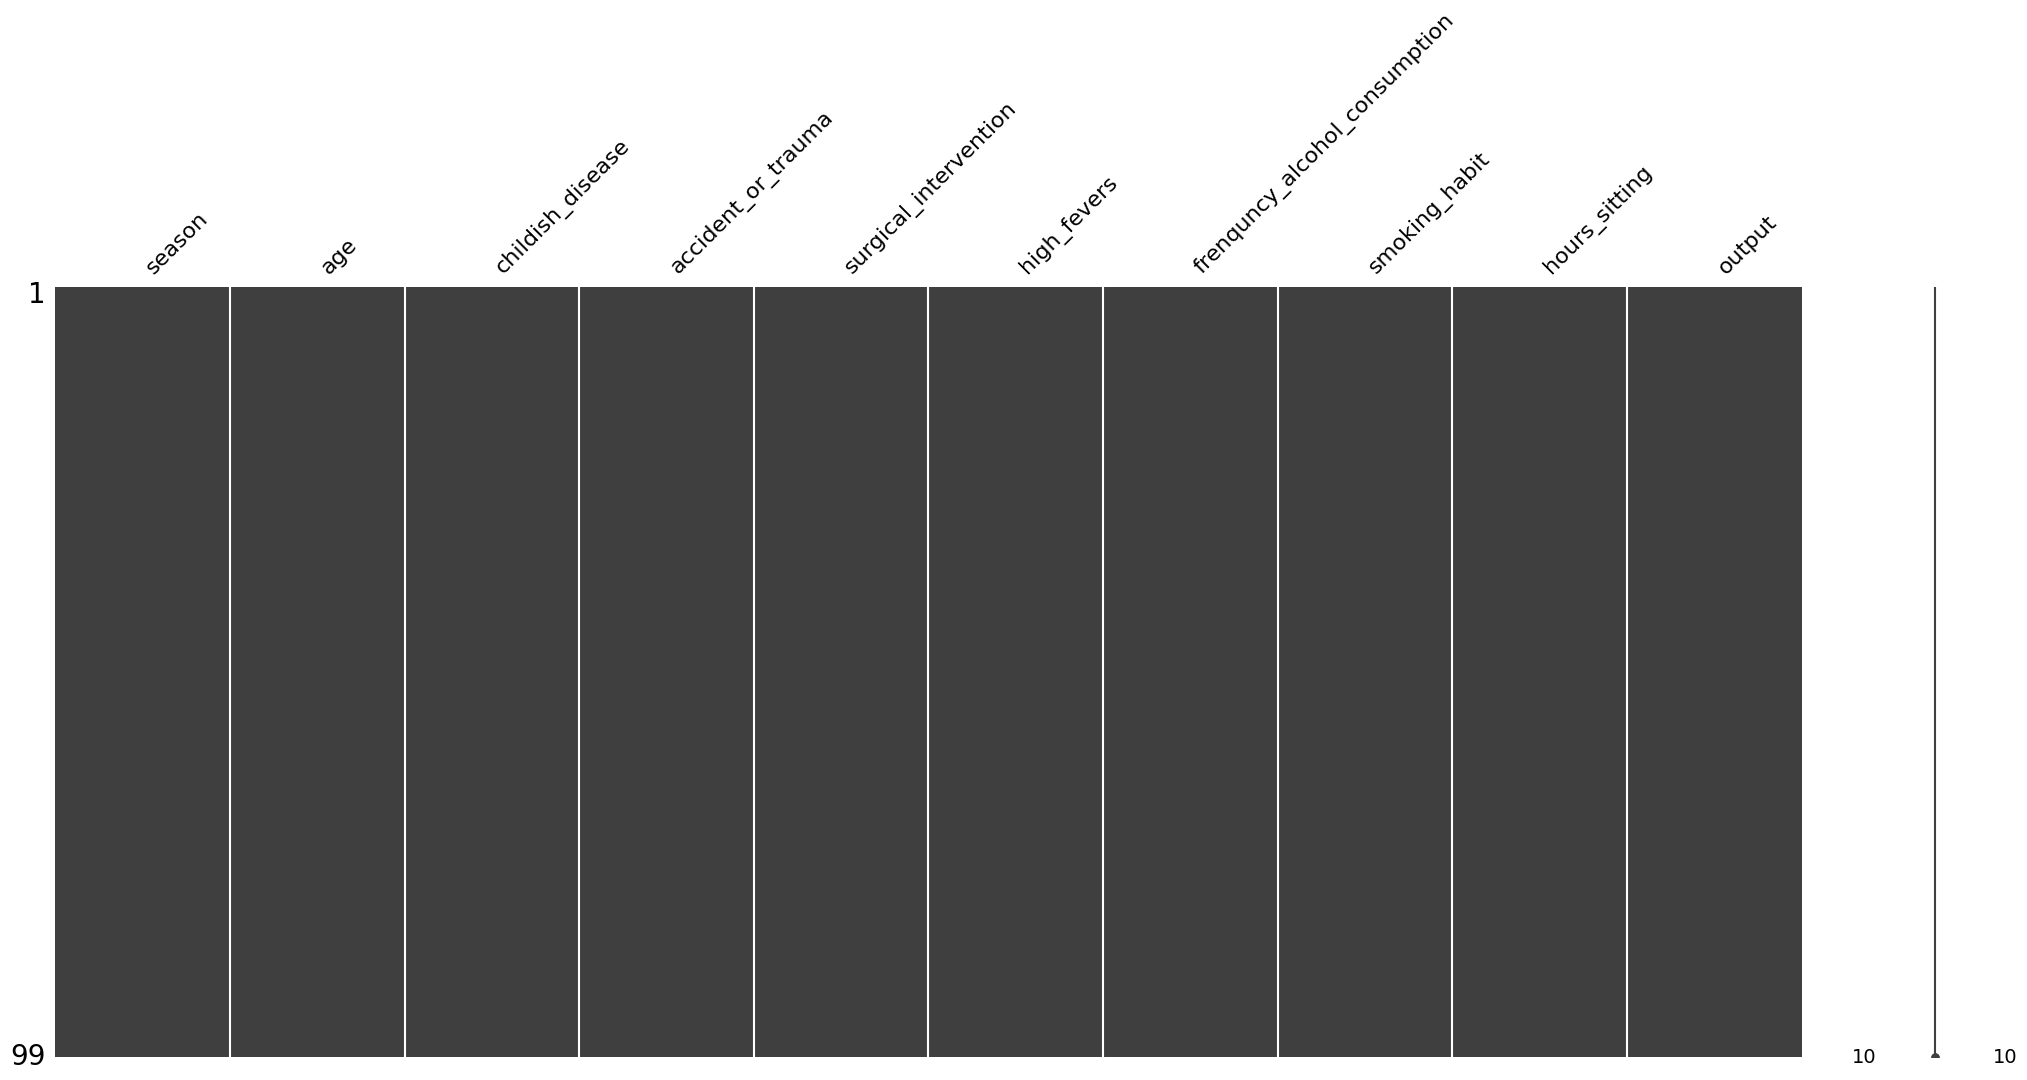

In [23]:
ms.matrix(dataset)

Como pode ser visto, os dois comandos que foram utilizados nos comprovaram que no dataset não existe dados faltantes, então não sera necessário criar códigos para correção desses dados.

##4.2) Separação em conjunto de treino e conjunto de teste

Depois de tratar, é hora do treino de algoritimos. Vamos separar uma parcela de 20% do conjunto para realizar testes, então os 80% que restaram será utilizado para modelagem.

No dataset trabalhado, a base obtem nove colunas com atributos e a ultima sendo a *output* sendo o resultado das pessoas se o diagnostico delas são normais ou alterados.

In [24]:
array = dataset.values
X = array[:,0:9]
y = array[:,9]

Para finalizar o trabalho, nos resta apenas separar os conjuntos. Utilizaremos a biblioteca SKLearn.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=0.20, shuffle=True, random_state=7, stratify=y)